In [1]:
import numpy as np
from os.path import join
from glob import glob
import matplotlib.pyplot as plt
from IPython.display import Audio

import librosa
import librosa.display

In [2]:
speak_files=glob("cv-corpus-9.0-2022-04-27/zh-TW/clips/*.mp3")
firetruck_files=glob("sounds/firetruck/*.wav")
construction_files=glob("sounds/splited_construction/*.wav")
print(
    "#人聲:",len(speak_files),
    "\n#消防車聲:",len(firetruck_files),
    "\n#工地聲:",len(construction_files)
)

#人聲: 116969 
#消防車聲: 200 
#工地聲: 11997


In [3]:
SEED=28
SAMPLE_RATE=16000
kwargs=dict(
    sr=SAMPLE_RATE,
    mono=True
)
x_signal,_=librosa.load(speak_files[SEED],**kwargs)
x_artifact,_=librosa.load(firetruck_files[SEED],**kwargs)
x_noise,_=librosa.load(construction_files[4],**kwargs)

/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [4]:
min_len=min(map(len,(x_signal,x_artifact,x_noise)))
x_signal=x_signal[:min_len]
x_artifact=x_artifact[:min_len]
x_noise=x_noise[:min_len]

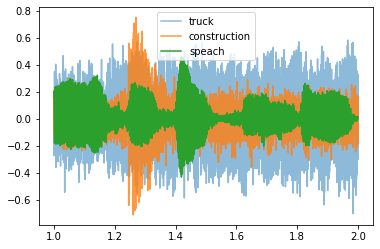

In [5]:
timegrid=range(round(SAMPLE_RATE*1),round(SAMPLE_RATE*2))
t=[t_/SAMPLE_RATE for t_ in timegrid]
plt.plot(t,x_artifact[timegrid],label="truck",alpha=0.5)
plt.plot(t,x_noise[timegrid],label="construction",alpha=0.8)
plt.plot(t,x_signal[timegrid],label="speach",alpha=1)
plt.legend()

In [145]:
def calculate_db(sig):
    mean_value=sig.mean()
    norm_sig=sig-mean_value
    return 10*np.log10(np.power(norm_sig,2).mean())-20*np.log10(abs(mean_value))

In [9]:
x_mixed=x_artifact+x_noise+x_signal
calc_spectrum=lambda y:librosa.feature.melspectrogram(y=y,
                                     sr=SAMPLE_RATE,
                                     n_mels=256,
                                     power=4)
S_mixed,S_artifact,S_noise,S_signal=[
    *map(
        calc_spectrum,
            (x_mixed,
            x_artifact,
            x_noise,
            x_signal)
    )
]
ref=S_mixed.max()

In [10]:
Audio(x_mixed,rate=SAMPLE_RATE)

In [147]:
def see_spectrum(S):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(
        librosa.power_to_db(S, ref=ref)
        , y_axis='mel', x_axis='time',)
    plt.colorbar(format='%+2.0f dB')
    plt.clim(-60,0)
    plt.title('Mel spectrogram(Time: seconds)')
    plt.tight_layout()
    plt.show()

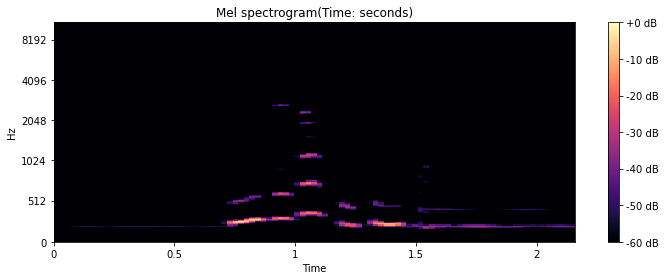

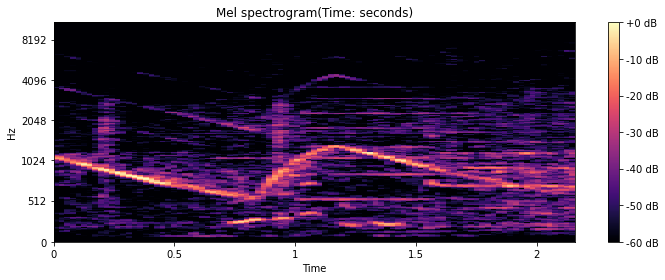

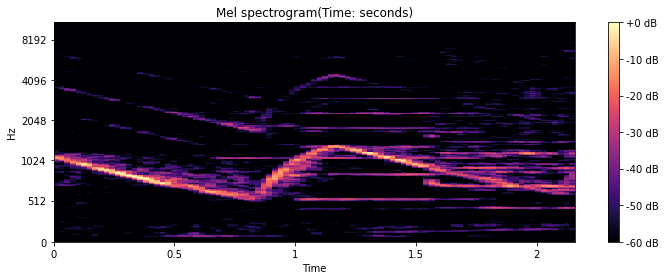

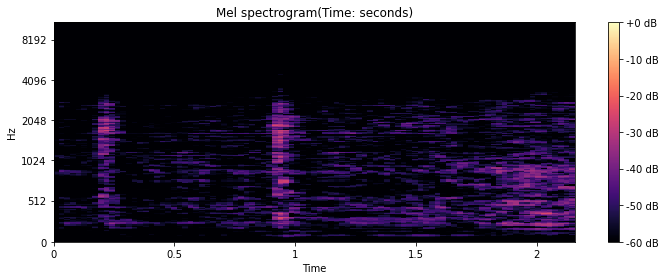

In [148]:
see_spectrum(S_signal)
see_spectrum(S_mixed)
see_spectrum(S_artifact)
see_spectrum(S_noise)